In [1]:
import sqlite3
import re
import pandas as pd
from collections import Counter
from nltk.classify import NaiveBayesClassifier
import matplotlib.pyplot as plt
import nltk

pos_sql = 'data/wiktionary/wiktionary.db' # db -> lexikon
text_sql = 'data/text_processing/text_processing.db' #db -> spellcheck
amazon_sql = 'data/amazon/amazon.db'

In [2]:
# Lade Amazon_raw
conn=sqlite3.connect(amazon_sql)
cur = conn.cursor()
cur.execute('SELECT ID, rating FROM dvd')
getrating={ID:rating for ID, rating in cur}
conn.close() 

#test
getrating[0]

'2.0'

In [3]:
conn=sqlite3.connect(text_sql)
cur = conn.cursor()
cur.execute('SELECT ID,text FROM ner')
data={ID:text for ID, text in cur}
conn.close()

In [4]:
# Lade POS-Tagger
conn=sqlite3.connect(pos_sql)
cur = conn.cursor()
cur.execute('SELECT token, quick_stemm, quick_pos FROM lexikon')
pos_tag_n={token:(quick_stemm,quick_pos) for token, quick_stemm, quick_pos in cur}
pos_tag_low={token.lower():value for token, value in pos_tag_n.items()}
conn.close() 

#test
pos_tag_n['geladen']

('laden', 'Verb')

In [5]:
c=Counter(re.sub('\s+',' ',' '.join(data.values())).strip().split(' '))
c_low={w.lower():count for w,count in c.items()}
print(c.most_common(30))

[('.', 818984), ('der', 627541), ('und', 345127), ('sein', 342456), ('die', 309153), ('ein', 290806), ('Film', 156900), ('nicht', 154044), ('haben', 146574), ('in', 137051), ('zu', 131797), ('titel', 131274), ('ich', 129711), ('werden', 118078), ('auch', 102600), ('mit', 95389), ('es', 95024), ('sich', 92350), ('von', 91279), ('auf', 87354), ('man', 77923), ('gut', 75565), ('können', 74015), ('dies', 73325), ('sie', 64718), ('abern', 64626), ('nur', 63872), ('als', 62841), ('für', 62083), ('so', 58506)]


In [6]:
def pos_tag(String, pos_dic,pos_dic_low):
    try:
        return pos_dic[String][1]
    except:
        try:
            return pos_dic_low[String.lower()][1]
        except:
            return 'None'
df=pd.DataFrame([(tok,count,pos_tag(tok,pos_tag_n, pos_tag_low)) for tok,count in c.items()], columns=['token','n','pos']).sort_values('n', ascending=False)
df[:10]

,token,n,pos
19688,.,818984,None
52914,der,627541,Artikel
78312,und,345127,Konjunktion
33138,sein,342456,Verb
51914,die,309153,Artikel
117336,ein,290806,Artikel
16375,Film,156900,Substantiv
17604,nicht,154044,Negation
130226,haben,146574,Verb
16527,in,137051,Präposition


# Aspekte

In [7]:
df[(df['pos']=='Substantiv')][:50]

,token,n,pos
16375,Film,156900,Substantiv
96431,figur,56924,Substantiv
101935,Die,41880,Substantiv
11675,Ich,39200,Substantiv
134517,Szene,19659,Substantiv
115923,Serie,17578,Substantiv
14128,Story,17070,Substantiv
132576,Teil,16771,Substantiv
2575,Jahr,16321,Substantiv
64799,Fan,16017,Substantiv


In [8]:
df[(df['pos']=='Substantiv')][50:100]

,token,n,pos
108846,Dialog,6452,Substantiv
29835,indefinitpronomen,6254,Substantiv
128622,Wenn,6225,Substantiv
67768,Mann,6160,Substantiv
104124,Effekt,6124,Substantiv
130295,Spannung,6000,Substantiv
119635,Regisseur,5989,Substantiv
65906,Leider,5876,Substantiv
136300,Wie,5750,Substantiv
12840,Geld,5695,Substantiv


In [9]:
df[(df['pos']=='Verb')][:50]

,token,n,pos
33138,sein,342456,Verb
130226,haben,146574,Verb
78868,titel,131274,Verb
24272,werden,118078,Verb
32539,auch,102600,Verb
104103,können,74015,Verb
53809,abern,64626,Verb
119926,noch,53366,Verb
19302,schauspieler,47150,Verb
63003,sehen,38952,Verb


In [10]:
df[(df['pos']=='Adjektiv')][:50]

,token,n,pos
71541,gut,75565,Adjektiv
107460,viel,39479,Adjektiv
107838,ganz,29563,Adjektiv
55377,einfach,29382,Adjektiv
76730,wirklich,27165,Adjektiv
75968,erste,19924,Adjektiv
20959,schlecht,19057,Adjektiv
130718,wollen,17074,Adjektiv
117453,groß,15976,Adjektiv
90711,wenig,15875,Adjektiv


In [11]:
# Aspekte
figur=['figur','held', 'charakter']
story=['story','handlung','geschichte', 'drehbuch','szene', 'unterhaltung','buch']
musik=['musik','ton']
schauspiel=['darstellung','schauspieler','schauspielerin','darstellen','schauspiel']
video=['video','bild','schnitt']
allgemein=['titel','film','streifen','serie','filmchen','filmen']
preis=['kaufen','geld','preis','euro']
regie=['regisseur','umsetzung','regie']
bewertung=['stern','bewertung']
effekt=['effekt']

In [12]:
aspects={}
for f in figur:
    aspects[f]='figur'
for f in story:
    aspects[f]='story'
for f in musik:
    aspects[f]='musik'
for f in schauspiel:
    aspects[f]='schauspiel'
for f in musik:
    aspects[f]='allgemein'
for f in preis:
    aspects[f]='preis'    
for f in regie:
    aspects[f]='regie'    
for f in bewertung:
    aspects[f]='bewertung'
for f in effekt:
    aspects[f]='effekt'

# Sentiments

In [13]:
def to_aspekt(String,dic):
    try:
        return aspects[String.lower()]
    except:
        try:
            return aspects[String.lower().title()]
        except:
            return String


def is_sent(String, dic):
    try:
        pos = dic[String]
        if pos[1] in ['Substantiv','Verb','Adjektiv', 'Komparativ','Superlativ']:
            return String
        else:
            return 'None'
    except:
        return 'None'

data_sent=[(ID,[to_aspekt(tok,aspects) for tok in review.split(' ') if is_sent(tok, pos_tag_n)!='None' and len(tok)>2]) for ID,review in data.items()]

c=' '.join([' '.join(text) for ID, text in data_sent])
c=Counter(re.sub('\s+',' ',c).strip().split(' '))
c_low={w.lower():count for w,count in c.items()}

print(data_sent[:5])

[(0, ['titel', 'präsentieren', 'Vorgeschichte', 'cool', 'Mutant', 'weilen', 'titel', 'anscheinend', 'gut', 'Idee', 'mehren', 'Fortsetzung', 'vorhanden', 'sein', 'sehen', 'schauspiel', 'kämpfen', 'schauspiel', 'brüllen', 'Muskel', 'anspannen', 'schauspiel', 'kuscheln', 'schauspiel', 'wieder', 'kämpfen', 'Nichts', 'weit', 'pausenlos', 'wieder', 'hold', 'enden', 'visuell', 'Reiz', 'Macho', 'posen', 'kalkulieren', 'vorhersehbar', 'story', 'geben', 'auch', 'noch', 'Film', 'sein', 'bunt', 'haben', 'viel', 'Knalleffekt', 'Aber', 'Seele', 'bewertung', 'kurzweilig', 'story', 'schnellen', 'wieder', 'vergessen', 'Ich', 'haben', 'titel', 'Fortsetzung', 'titel', 'spinnen', 'finden']), (1, ['kommen', 'gerade', 'Kino', 'großartig', 'Film', 'Ein', 'Postbeamter', 'mögen', 'unbedingt', 'Meer', 'versetzen', 'werden', 'begehen', 'Übereifer', 'werden', 'Nordfrankreich', 'strafversetzen', 'aufrecht', 'tot', 'Zaun', 'hängen', 'frieren', 'Zehe', 'scheinen', 'Art', 'Sibirien', 'Frankreich', 'sein', 'schlecht',

In [14]:
posids=[re.sub('[\s]+',' ',' '.join(sent)) for ID,sent in data_sent if int(getrating[ID][0])>3]
negids=[re.sub('[\s]+',' ',' '.join(sent))  for ID,sent in data_sent if int(getrating[ID][0])<3]

In [15]:
len(posids),len(negids),len(posids)+len(negids),len(posids)/(len(posids)+len(negids)),len(negids)/(len(posids)+len(negids))

(45748, 45758, 91506, 0.49994535877428803, 0.500054641225712)

In [16]:
def word_feats(words):
    return dict([(word, True) for word in words.split()])

pos_feats = [(word_feats(f), 'positive') for f in posids ]
neg_feats = [(word_feats(f), 'negative') for f in negids ]
trainfeats = pos_feats + neg_feats
classifier = NaiveBayesClassifier.train(trainfeats)

data2=[]
for word in set(' '.join(posids+negids).split(' ')):
    dist = classifier.prob_classify(word_feats(word))
    labels=sorted([(word,label, dist.prob(label)) for label in dist.samples()])
    temp=(labels[0][0],labels[0][2],labels[1][2])
    data2.append(temp)
    
df=pd.DataFrame(sorted(data2), columns=['tok','neg','pos'])

n=[c[word] for word in list(df['tok'])]

df['n']=n
df[:10]

,tok,neg,pos,n
0,,0.500055,0.499945,0
1,Aach,0.250000,0.750000,1
2,Aachen,0.583333,0.416667,5
3,Aachener,0.750000,0.250000,1
4,Aal,0.708333,0.291667,12
5,Aalfang,0.250000,0.750000,1
6,Aaron,0.359375,0.640625,34
7,Aasgeier,0.625000,0.375000,3
8,Aba,0.388889,0.611111,36
9,Abandon,0.125000,0.875000,3


In [17]:
df2 = pd.DataFrame(columns=df.columns)

for asp in set(aspects.values()):
    temp1=df[df['tok']==asp].copy()
    if asp!=asp.title():
        temp2=df[df['tok']==asp.title()].copy()
        df2 = pd.concat([df2,temp1,temp2])
    else:
        df2 = pd.concat([df2,temp1])
df2.sort_values('neg', ascending=False)
#Aspekte sollten möglichst neutral sein

,tok,neg,pos,n
35737,bewertung,0.606874,0.393126,16506
36670,effekt,0.583088,0.416912,6124
41771,preis,0.570949,0.429051,23542
43399,story,0.541956,0.458044,79874
42105,regie,0.527268,0.472732,11596
37766,figur,0.492156,0.507844,16133
42503,schauspiel,0.482410,0.517590,67843
34137,allgemein,0.412628,0.587372,16787


# Negativ allgemein

In [18]:
df[df['neg']>0.7].sort_values('n', ascending=False)[:50]

,tok,neg,pos,n
42585,schlecht,0.797145,0.202855,19057
40285,langweilig,0.793581,0.206419,7395
37170,enttäuscht,0.776303,0.223697,6487
24440,Schaden,0.765628,0.234372,4635
35795,billig,0.813295,0.186705,3372
45736,weg,0.748657,0.251343,3064
8658,Finger,0.871257,0.128743,2917
42616,schlimm,0.734434,0.265566,2880
42792,schwach,0.700363,0.299637,2779
40528,lächerlich,0.854719,0.145281,2324


# Positiv allgemein

In [19]:
df[df['pos']>0.7].sort_values('n', ascending=False)[:50]

,tok,neg,pos,n
27381,Staffel,0.281009,0.718991,12294
38289,genial,0.264168,0.735832,5733
43540,super,0.297417,0.702583,5349
41574,perfekt,0.197383,0.802617,4221
35253,begeistern,0.289709,0.710291,4090
40463,live,0.283623,0.716377,3698
39778,klass,0.248048,0.751952,3296
42913,sehenswert,0.299423,0.700577,3274
46073,wunderbar,0.194330,0.805670,3004
40480,lohnen,0.292632,0.707368,2741


# stark negativ

In [20]:
df[df['neg']>0.95].sort_values('neg', ascending=False)[:50]

,tok,neg,pos,n
10255,Geldverschwendung,0.996575,0.003425,145
33137,Zeitverschwendung,0.982227,0.017773,426
22701,Qualitätskontrolle,0.981481,0.018519,27
13422,Ideenlosigkeit,0.980769,0.019231,25
8816,Flickwerk,0.977273,0.022727,21
43337,sterbenslangweilig,0.975000,0.025000,59
38067,futsch,0.973684,0.026316,18
44814,vergeuden,0.972222,0.027778,161
40070,krampfen,0.970588,0.029412,16
9843,Gebrüll,0.968750,0.031250,15


# Stark Positiv

In [21]:
df[df['pos']>0.95].sort_values('pos', ascending=False)[:50]

,tok,neg,pos,n
20862,Oscarverleihung,0.016667,0.983333,30
5156,Court,0.027778,0.972222,18
2521,Bangen,0.027778,0.972222,17
38776,heimatlich,0.029412,0.970588,16
6979,Emmy,0.030612,0.969388,57
12439,Helsinki,0.031250,0.968750,20
18984,Missgunst,0.031250,0.968750,16
18027,Mailand,0.031250,0.968750,17
19451,Musikalität,0.031250,0.968750,16
28901,Thanksgiving,0.031250,0.968750,20


In [22]:
df[df['pos']>0.7].sort_values('pos', ascending=True)[:50]

,tok,neg,pos,n
42913,sehenswert,0.299423,0.700577,3274
43621,tadellos,0.299296,0.700704,143
43782,tollpatschig,0.299242,0.700758,132
9630,Gabe,0.299107,0.700893,125
35247,begegnen,0.299054,0.700946,445
7365,Erfüllung,0.299020,0.700980,109
14907,Keyboard,0.298780,0.701220,88
16431,Kunststück,0.298780,0.701220,82
46633,zärtlich,0.298611,0.701389,74
46433,zurückkehren,0.298611,0.701389,219


In [23]:
df[df['pos']>0.9].sort_values('n', ascending=False)[:50]

,tok,neg,pos,n
45712,warmherzig,0.095000,0.905000,104
32794,Wunderbares,0.086207,0.913793,87
43198,spitzenmäßig,0.087838,0.912162,73
33417,Zugreifen,0.078571,0.921429,71
6979,Emmy,0.030612,0.969388,57
26584,Solist,0.095745,0.904255,55
20633,Offenheit,0.063636,0.936364,54
25077,Schmuckstück,0.097826,0.902174,45
28186,Suchtgefahr,0.081395,0.918605,42
3174,Bernstein,0.071429,0.928571,40


# Auswahl

In [24]:
pos_sent=df[(df['pos']>0.75) & (df['n']>100)]
len(pos_sent)

176

In [25]:
pos_sent

,tok,neg,pos,n
22,Abbruch,0.152878,0.847122,277
344,Abzug,0.237748,0.762252,821
638,Album,0.232301,0.767699,1077
737,Alltag,0.228261,0.771739,536
1370,April,0.244361,0.755639,146
1392,Arbeiter,0.221649,0.778351,110
1662,Atem,0.243083,0.756917,270
1870,Aufstieg,0.246429,0.753571,153
1939,Augenzwinkern,0.239130,0.760870,161
2310,Award,0.218254,0.781746,166


In [26]:
neg_sent=df[(df['neg']>0.75) & (df['n']>100)]
len(neg_sent)

271

In [27]:
neg_sent

,tok,neg,pos,n
129,Abklatsch,0.778670,0.221330,451
340,Abzocke,0.853160,0.146840,282
830,Amateur,0.837110,0.162890,370
974,Aneinanderreihung,0.923367,0.076633,398
1168,Ansatz,0.786061,0.213939,894
1213,Anstatt,0.773026,0.226974,151
1790,Aufguss,0.826531,0.173469,148
2057,Ausleihen,0.845238,0.154762,125
3030,Beleidigung,0.905063,0.094937,246
3379,Betrug,0.765734,0.234266,142


# Deskriptiv

In [28]:
maxv=[round((v),2) for v in list(df["pos"])]

In [29]:
plt.figure(figsize=(0, 0))

In [30]:
freqdist = nltk.FreqDist(maxv)
x=[t[0] for t in sorted(list(freqdist.items()))]
y=[t[1] for t in sorted(list(freqdist.items()))]

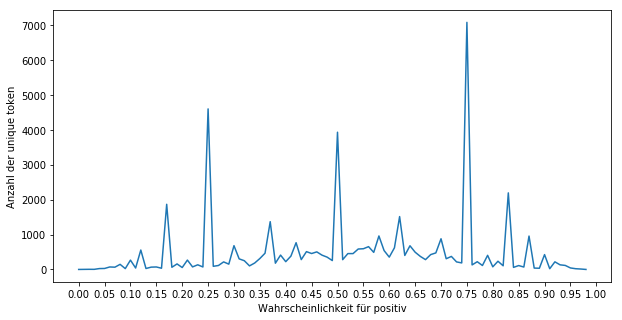

In [31]:
plt.figure(figsize=(10, 5))
plt.xlabel('Wahrscheinlichkeit für positiv')
plt.ylabel('Anzahl der unique token')
plt.xticks([float(x)/20 for x in range(21)])
plt.plot(x,y)

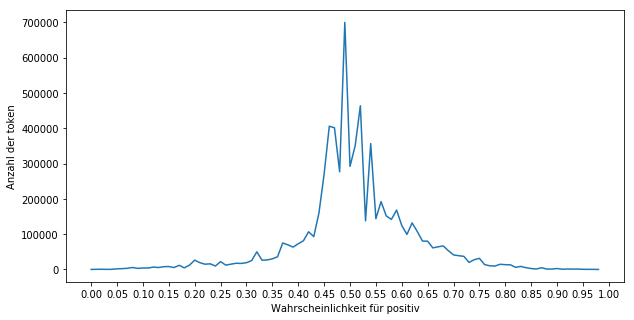

In [32]:
countit={}
for ix,row in df[["pos",'n']].iterrows():
    try:
        countit[round(row['pos'],2)]+=int(row['n'])
    except:
        countit[round(row['pos'],2)]=int(row['n'])
x=[t[0] for t in sorted(list(countit.items()))]
y=[t[1] for t in sorted(list(countit.items()))]
plt.figure(figsize=(10, 5))
plt.xlabel('Wahrscheinlichkeit für positiv')
plt.ylabel('Anzahl der token')
plt.xticks([float(x)/20 for x in range(21)])
plt.plot(x,y)

In [74]:
def direction(x):
    d='neu'
    if x>0.6:
        d='pos'
    elif x<0.4:
        d='neg'
    else:
        d='neu'
    return d

df['dir']=[direction(x) for x in list(df['pos'])]

In [75]:
df[:10]

,tok,neg,pos,n,dir
0,,0.500055,0.499945,0,neu
1,Aach,0.250000,0.750000,1,pos
2,Aachen,0.583333,0.416667,5,neu
3,Aachener,0.750000,0.250000,1,neg
4,Aal,0.708333,0.291667,12,neg
5,Aalfang,0.250000,0.750000,1,pos
6,Aaron,0.359375,0.640625,34,pos
7,Aasgeier,0.625000,0.375000,3,neg
8,Aba,0.388889,0.611111,36,pos
9,Abandon,0.125000,0.875000,3,pos


# Stopwords

In [76]:
pos_tag_n['nicht'],pos_tag_n['kein']

(('nicht', 'Negation'), ('kein', 'indefinitpronomen'))

In [77]:
c['Dänemark']

74

In [78]:
import nltk
from nltk.corpus import stopwords
swords=set(stopwords.words('german'))

In [79]:
relevant={w:None for w in list(df[(df['n']>50) & (df['dir']!='neu')]['tok'])}
#relevant={w:None for w in list(df[(df['n']>50)]['tok'])}
def check(String,relevant,pos_tag_n):
    try:
        relevant[String]
        if pos_tag_n[String][1] in ['Substantiv','Verb','Adjektiv', 'Komparativ','Superlativ','Negation']:
            try:
                if pos_tag_n[String.lower()][1] not in ['Substantiv','Verb','Adjektiv', 'Komparativ','Superlativ','Negation']:
                    return False
            except:
                pass
                
            return True
        else:
            return False
    except:
        return False

In [80]:
conn=sqlite3.connect(text_sql)
cur = conn.cursor()
cur.execute('SELECT ID,text FROM ner')
data={ID:text for ID, text in cur}
conn.close()

In [81]:
data2=[(ID, ' '.join([tok for tok in text.split(' ') if tok.strip()=='.' or check(tok,relevant,pos_tag_n)!=False or tok in aspects.values() or tok.lower()=='kein'])) for ID, text in data.items()]

In [83]:
dfx=pd.DataFrame(data2, columns=['ID','text'])

db='stopwords' 
conn = sqlite3.connect(text_sql)
cur = conn.cursor()                                 

wildcards = ','.join(['?'] * len(dfx.columns))              

cur.execute("drop table if exists %s" % db)

col_str = '"' + '","'.join(dfx.columns) + '"'
cur.execute("create table %s (%s)" % (db, col_str))

cur.executemany("insert into %s values(%s)" % (db, wildcards), [tuple(x) for x in dfx.values])

conn.commit()
conn.close()


dfx=pd.DataFrame(data2, columns=['ID','text'])

db='tfidf' 
conn = sqlite3.connect(text_sql)
cur = conn.cursor()                                 

wildcards = ','.join(['?'] * len(dfx.columns))              

cur.execute("drop table if exists %s" % db)

col_str = '"' + '","'.join(dfx.columns) + '"'
cur.execute("create table %s (%s)" % (db, col_str))

cur.executemany("insert into %s values(%s)" % (db, wildcards), [tuple(x) for x in dfx.values])

conn.commit()
conn.close()

# skip ner

In [85]:
conn=sqlite3.connect(text_sql)
cur = conn.cursor()
cur.execute('SELECT ID,text FROM spellcheck')
data={ID:text for ID, text in cur}
conn.close()

data2=[(ID, ' '.join([tok for tok in text.split(' ') if tok.strip()=='.' or check(tok,relevant,pos_tag_n)!=False or tok in aspects.values() or tok.lower()=='kein'])) for ID, text in data.items()]

dfx=pd.DataFrame(data2, columns=['ID','text'])

db='skip_ner' 
conn = sqlite3.connect(text_sql)
cur = conn.cursor()                                 

wildcards = ','.join(['?'] * len(dfx.columns))              

cur.execute("drop table if exists %s" % db)

col_str = '"' + '","'.join(dfx.columns) + '"'
cur.execute("create table %s (%s)" % (db, col_str))

cur.executemany("insert into %s values(%s)" % (db, wildcards), [tuple(x) for x in dfx.values])

conn.commit()
conn.close()

# only movies

In [42]:
amazon_sql = 'data/amazon/amazon.db'
ner_sql = 'data/data.db' #db -> ner
pos_sql = 'data/wiktionary/wiktionary.db' # db -> lexikon
text_sql = 'data/text_processing/text_processing.db' #db -> spellcheck

# Lade Amazon_raw
conn=sqlite3.connect(amazon_sql)
cur = conn.cursor()
cur.execute('SELECT asin, ID FROM dvd')
getasin={ID:asin for asin, ID in cur}
conn.close() 


In [43]:
# Lade Asin-Match
conn=sqlite3.connect(ner_sql)
cur = conn.cursor()
cur.execute('SELECT asin, p0 FROM titlematch')
matches={asin:p0 for asin, p0 in cur}
conn.close() 

#test
float(matches[getasin[0]])

1.0

In [44]:
data3=[(ID, text) for ID, text in data2 if float(matches[getasin[ID]])>=0.9]
len(data2), len(data3)

(91506, 71802)

In [45]:
dfx=pd.DataFrame(data3, columns=['ID','text'])

db='only_movies' 
conn = sqlite3.connect(text_sql)
cur = conn.cursor()                                 

wildcards = ','.join(['?'] * len(dfx.columns))              

cur.execute("drop table if exists %s" % db)

col_str = '"' + '","'.join(dfx.columns) + '"'
cur.execute("create table %s (%s)" % (db, col_str))

cur.executemany("insert into %s values(%s)" % (db, wildcards), [tuple(x) for x in dfx.values])

conn.commit()
conn.close()